In [2]:
# Importing basic libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# For preprocessing the data..
# from sklearn.preprocessing import Imputer
from sklearn import preprocessing

# To split the dataset into train and test datasets..
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier..
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model..
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
# Loading data from datafile..
pima_df=pd.read_csv('diabetes.csv')

In [5]:
pima_df.shape

(768, 9)

In [6]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Adding headers to the dataframe..
pima_df.columns = ['preg','gluco','pres','skin','insulin','mass','pedi','age','class']

In [8]:
pima_df.head()

,preg,gluco,pres,skin,insulin,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   gluco    768 non-null    int64  
 2   pres     768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   mass     768 non-null    float64
 6   pedi     768 non-null    float64
 7   age      768 non-null    int64  
 8   class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='class', ylabel='count'>

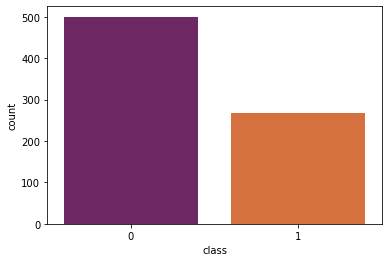

In [13]:
sns.countplot(x='class',data=pima_df,palette='inferno')

In [14]:
# Handling missing data
# Test whether there is any null value in our dataset or not.
pima_df.isnull().sum()

preg       0
gluco      0
pres       0
skin       0
insulin    0
mass       0
pedi       0
age        0
class      0
dtype: int64

In [15]:
# The above output shows that there is no “null” value in our dataset.

In [16]:
# Let us check whether dataset has any other non-numeric value in rows or columns...
pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,gluco,pres,skin,insulin,mass,pedi,age,class


In [17]:
## since there is no output, we can conclude that there is no non-numeric values or junk characters in the dataset...

In [19]:
# Lets see the count of missing values('0') for these columns...excluding the class column...
print((pima_df[['preg','gluco','pres','skin','insulin','mass','pedi','age']]==0).sum())

preg       111
gluco        5
pres        35
skin       227
insulin    374
mass        11
pedi         0
age          0
dtype: int64


In [20]:
# Deleting the missing values may reduce the dataset count aggressively..
# So, lets first update those '0' values to NaN values..
pima_df[['preg','gluco','pres','skin','insulin','mass']] = pima_df[['preg','gluco','pres','skin','insulin','mass']].replace(0,np.NaN)

In [22]:
pima_df.head(5)

,preg,gluco,pres,skin,insulin,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [34]:
pima_df.isnull().sum()

preg       111
gluco        5
pres        35
skin       227
insulin    374
mass        11
pedi         0
age          0
class        0
dtype: int64

In [35]:
# Then lets replace the missing values(NaN) of each columns by its mean value...
pima_df.mean()

preg         4.494673
gluco      121.686763
pres        72.405184
skin        29.153420
insulin    155.548223
mass        32.457464
pedi         0.471876
age         33.240885
class        0.348958
dtype: float64

In [36]:
pima_df.fillna(pima_df.mean(), inplace = True)
pima_df.isnull().sum()

preg       0
gluco      0
pres       0
skin       0
insulin    0
mass       0
pedi       0
age        0
class      0
dtype: int64

In [37]:
pima_df.head(10)

,preg,gluco,pres,skin,insulin,mass,pedi,age,class
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [38]:
## Deep copy of pima_df
pima_df_rev = pima_df.copy(deep=True)

In [39]:
pima_df_rev.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,4.494673,2.975395,1.000,2.00000,4.494673,6.000000,17.00
gluco,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
pres,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
skin,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
mass,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [40]:
# Lets see the correlation between the attributes and the distribution of the attributes using pairplot...

In [42]:
pima_df_rev.corr()

,preg,gluco,pres,skin,insulin,mass,pedi,age,class
preg,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
gluco,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
pres,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
skin,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
mass,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
pedi,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
class,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


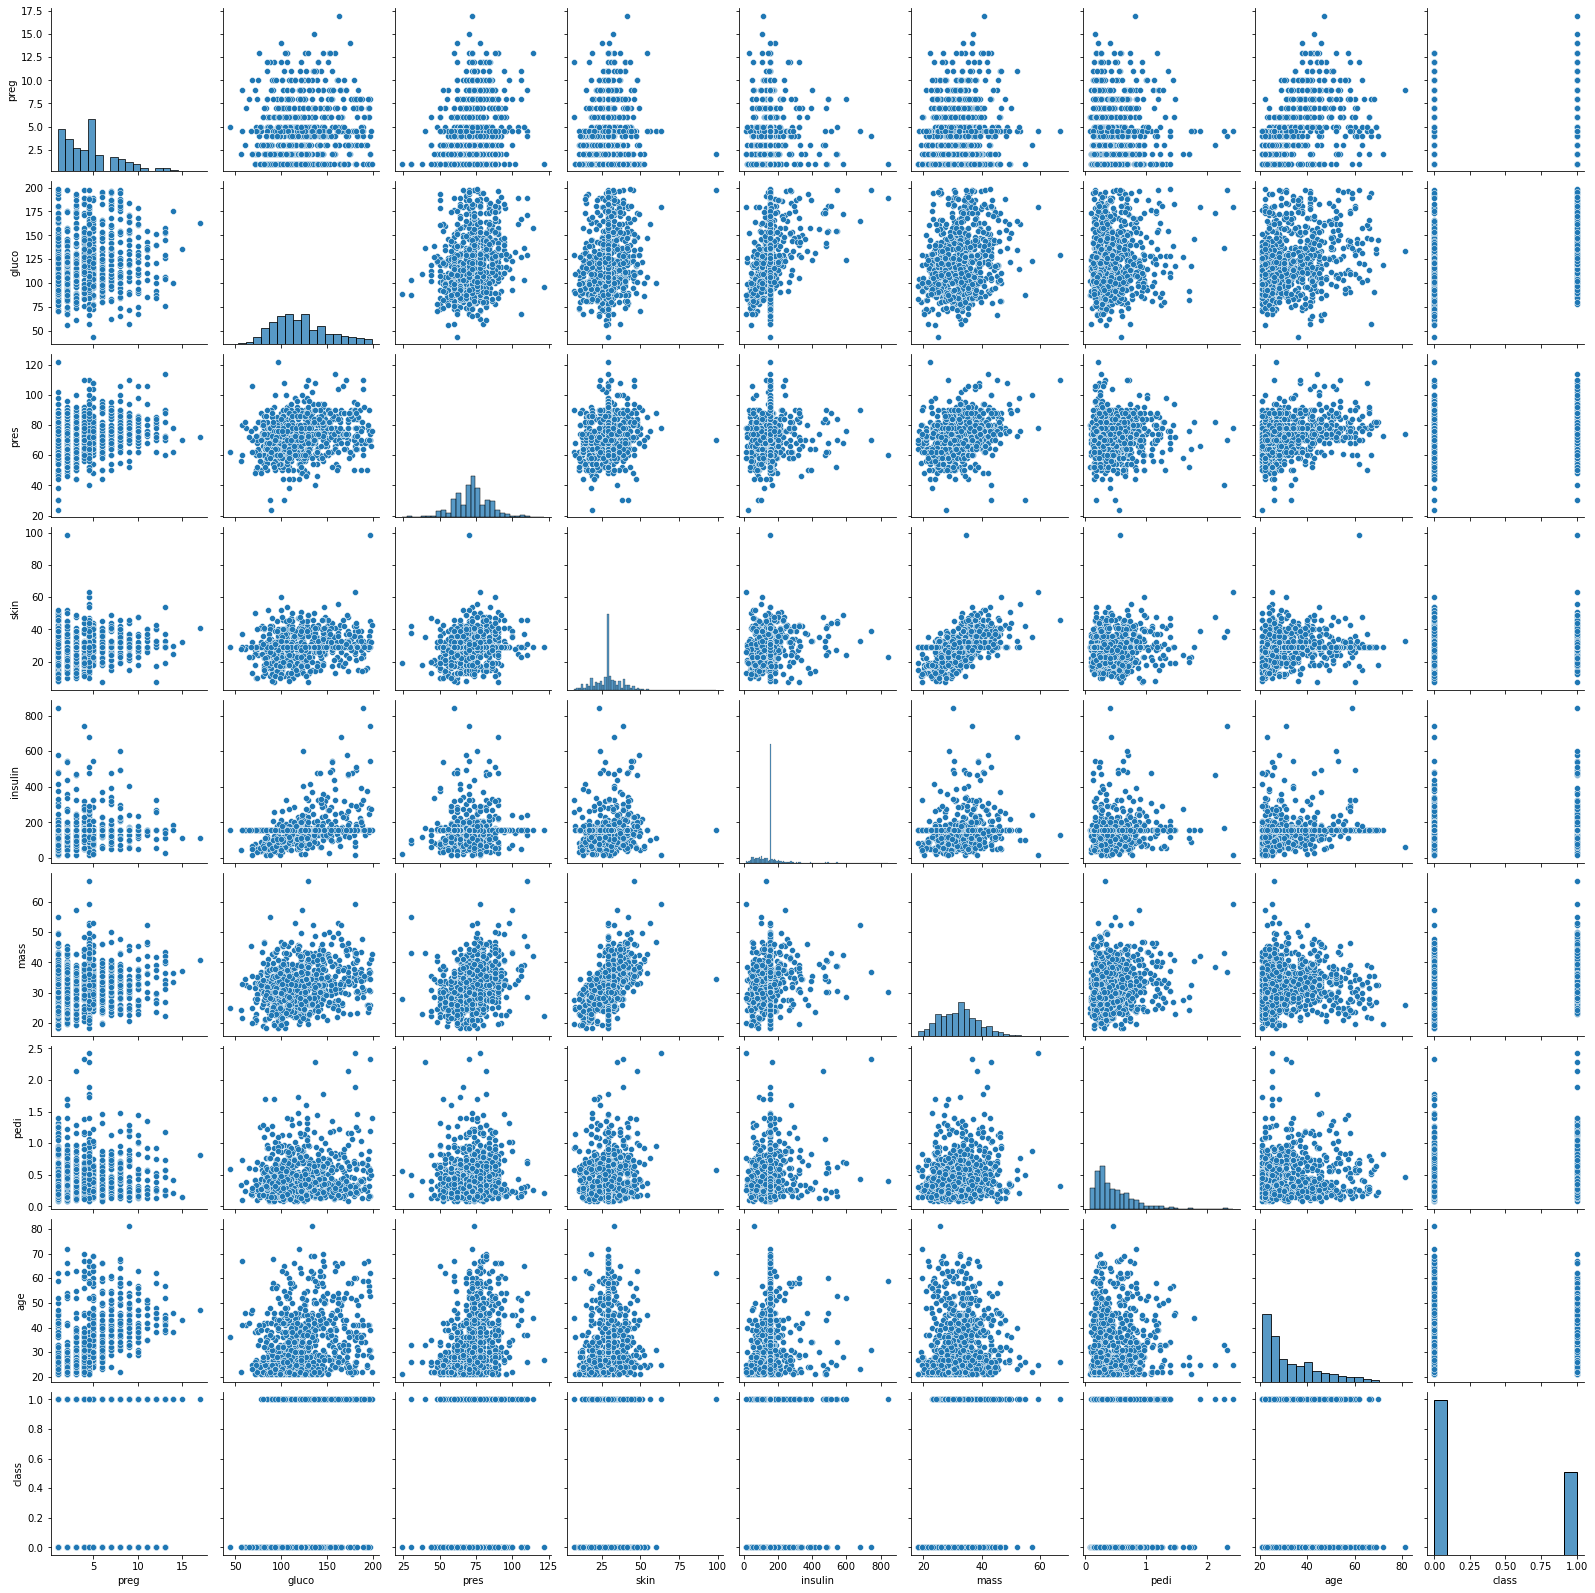

In [43]:
sns.pairplot(data=pima_df_rev)

In [44]:
# Data Slicing..
# Arrange data into independent variables and dependent variables
X = pima_df_rev.values[:,:8]  ## Features
Y = pima_df_rev.values[:,8]  ## Target

In [49]:
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state = 10)

In [50]:
# Implement Gaussian Naive Bayes

In [51]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [52]:
# Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
# After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as 
# its parameters.

In [53]:
Y_pred = GNB.predict(X_test)

In [54]:
# Accuracy of our Gaussian Naive Bayes model
accuracy_score(Y_test, Y_pred, normalize = True)

0.7316017316017316

In [55]:
# Determining confusion matrix
df_table = confusion_matrix(Y_test, Y_pred)
print(df_table)

[[122  22]
 [ 40  47]]


In [38]:
# Measure performance for classifcation

In [56]:
df_table = confusion_matrix(Y_test,Y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.73
precision:  0.68
recall   :  0.54
F1 score :  0.6


In [57]:
# Thus we have found accuracy, precision, recall and F1 score using Gaussion Naive Bayes algorithm 
# for the given pima indian diabetes data set.